# Digital images 

Digital image is representation of visual information (e.g. a photo, a drawing etc.) in a way that can be stored and processed by computers. The word *digital* means that the images are represented by numbers (digits). 

In the first part of the course we will learn the foundations of digital imaging and how Python can be used for creating and manipulating the images. The plan is as follows:

1. Pixels and resolution
2. Grayscale images as numeric 2D arrays
3. Color images as numeric 3D arrays
4. Load and save images to files
5. Capture images from camera
6. Image transformations
7. Batch processing (transform many files at once)

Let's start with the basics.

## Pixels and resolution

Unlike traditional photos or paintings, digital images are composed of small units called *[pixels](https://en.wikipedia.org/wiki/Pixel)*. Each pixel has a specific color or intensity which is coded with one or several numbers. So you can think about *digital image* is a table filled with these numbers. Cells of these tables are pixels.  Computer or other device with a screen turns these numbers to colors. The more pixels you have the smaller they are on the screen and the more fine details you can see. 

Here is a simple illustration from Wikipedia:

![Pixels](illustrations/Pixel-example.png)


Number of columns in such table is a *width* of the image and number of rows is its *height*. For example, image of size 800x600 means there are 800 columns and 600 rows (480 000 pixels). 

The number of pixels is a *resolution* of the image. For instance, a camera of iPhone 14 smartphone produces photos with 2532 x 1170 size — almost 3 millions pixels. A camera of iPhone 14 Plus produces photos with 2778 x 1284 size — almost 3.5 millions. Professional photo cameras, such as Canon EOS 1500D, can make photos of 6000 x 4000 size, which is 24 million pixels. In this case this number often is shortened to 24 Mp (million of pixels).

Here is an example of a low resolution digital image zoomed in so the pixels are visible by naked eye:

![Bird](illustrations/Bird.jpg)

In some specific cases, for example when we talk about resolution of a screen, we use only number of pixels which fits the width of the screen. For example 4K displays can fit about 4000 pixels along its width (usually 3840 pixels).

## Grayscale images


The simplest digital image consists of pixels, which are characterized by a single number, its *intensity*. Usually a whole number between 0 and 255 is used in this case. Computer (or any other device, e.g. smartphone or tablet) shows 0 as a black color, 255 as a while color and all numbers in between are shown as shades of gray. Therefore such images are usually called as *grayscale*.

Open the first sheet of [this Excel file](../mlcourse.xlsm) (enable macros when open), which demonstrates the idea of the grayscale image, and play with the intensities.

In Python we will use a special library to create the tables with pixel intensities, which is called [NumPy](https://numpy.org). This library is specifically developed to work with *arrays* — this is a way to call tables and other similar structures, which consist of only numbers in mathematics. *Array* is a versatile word for any rectangular structures with numbers, like tables, cuboids, etc. If array represents a table, it is called two-dimensional (2D) array or a *matrix*.

You can install NumPy by running the following chunk of code (you need to do it only once and then either remove it from this notebook or add symbol `#` in front of this line to deactivate it). This code also installs another useful library, [matplotlib](https://matplotlib.org), which will use in this class as well.

In [1]:
! pip install numpy matplotlib

zsh:1: command not found: pip



The code below shows how to load the NumPy library, and then use it to generate a table (2D array) with 50 rows and 100 columns filled with values of 255. 

In [2]:
# load numpy library and give it a short name "np"
import numpy as np

# generate simple array (sa) with 5 rows and 10 columns filled with zeros
sa = np.zeros((5, 10), dtype=int)
sa

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
# fill the values with 255
sa.fill(255)
sa

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])

In [4]:
# load numpy library and give it a short name "np"
import numpy as np

# generate array with 50 rows and 100 columns filled with 0
# dtype=int tells python that you want to work with integer (whole) numbers without decimals
img = np.zeros((50, 100), dtype=int)

# show size of array
img.shape

(50, 100)

In [5]:
# fill array with 255
img.fill(255)

# show value at first (0) row and first (0) column
img[0, 0]

255

In [6]:
# show values from the first 3 rows and first 5 columns of the array
img[0:3, 0:5]

array([[255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]])

 You can see that the numbers in the array are located inside "containers", which are delimited by squared brackets, `[` and `]`, like `[255, 255, 255]`. Values for every row has its own container, and then rows are combined together using the outer container.

If you want to get an access to a particular value, you need to use the array name you gave (in our case `img`) and the squared brackets as well. For example `img[0, 0]` will give you a number which is located in the first row and the first column of the array named `img`. In Python all indices start with 0, hence the first element (first row or column) has an index of 0 instead of 1.

In NumPy you can also specify a sequence of indices inside the squared brackets, like `0:3`. This means values from 0 to 3 but the last one is not included (so it will end up in a sequence of indices `[0, 1, 2]`). Thereby this code `img[0:3, 0:5]` tells NumPy to select rows from 0 to 2 (3 rows in total) and columns from 0 to 4 (5 columns).

If you want to show this array as an image you need another library, `matplotlib`. This library is used for making different plots, but we will use it mostly for showing images. Here is how to do it:

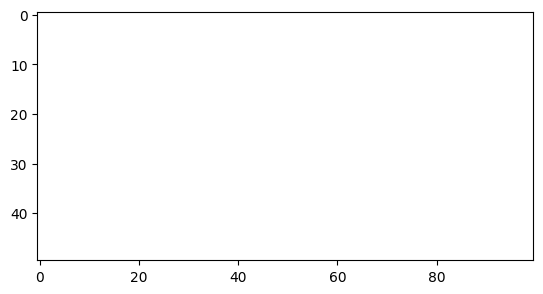

In [7]:
# import the plotting engine of library matplotlib and give it a short name "plt"
import matplotlib.pyplot as plt

# show image as a plot using gray scales
plt.imshow(img, cmap="gray", clim=(0, 255))

As you can see, it looks just like a white rectangle surrounded by a black box and axes. The numbers along the axes (ticks) correspond to pixels' indices (remember with have 100 pixels in width and 50 in height). 

Now let's create another image, where intensities of pixels will be equal to 127 and show it.


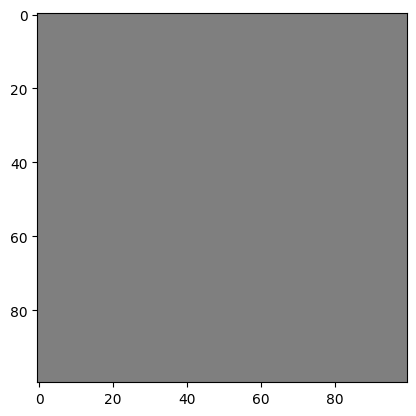

In [8]:
# create 2D array with 50 rows and 100 columns, fill it with 0 and then fill it with 127
img2 = np.zeros((100, 100), dtype=int)
img2.fill(127)

# show the array as an image
plt.imshow(img2, cmap="gray", clim=(0, 255))

As you can see, the image looks like a gray rectangle. Play with the code above and use numbers smaller or larger than 127 and see how it will influence the shade of gray on the image.

Now let's make something more complex. First we create 2D array filled with 0, but this time number of columns will be 256. After that, we take every column and fill it with different numbers — from 0 to 255. In order to do this we use a special coding pattern, which is called a *loop*

In [9]:
# simple loop example
for i in [1, 10, 100]:
    print(i ** 2)

1
100
10000


In [10]:
# generate range of numbers
r = range(0, 5)
r

range(0, 5)

In [11]:
# show range as a list
list(r)

[0, 1, 2, 3, 4]

In [12]:
# loop with range
for i in range(0, 5):
    print(i ** 2)

0
1
4
9
16


In [13]:
# create 2D array filled with zeros
img3 = np.zeros((50, 256), dtype=int)

In [14]:
# run a loop where variable "i" goes from 0 to 255. And use this loop to change
# intensity values in different columns of the array
for i in range(0, 256):
    img3[:, i] = i

# show the first 3 rows and 5 columns of the new array
img3[0:3, 0:5]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

As you can see, now every row of the array consists of a sequence of numbers from 0 to 255. Let's show these numbers as an image:

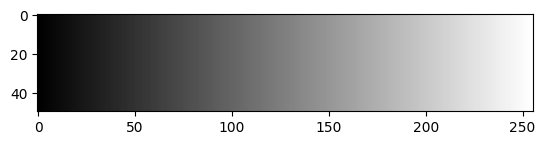

In [15]:
plt.imshow(img3, cmap="gray", clim=(0, 255))

Now you can see all 256 shades of gray color from 0 (black) to 255 (white). But of course it is difficult to distinguish the individual columns, as the pixels are relatively small and the difference between two adjacent levels of gray is barely distinguishable.

If you look back to the code with `for` loop, you can see that the code inside the loop is shifted to the right. For Python it is very important, indentation must be used for loops, conditions, functions etc. as you will see below. Python "understands" when loop ends when it "sees" a code without the shift. 

By understanding the programming principles and the idea of representing an image as an array of numbers one can create any image. For example, the image below resembles the Danish national flag but in black and white representation. We simply create a black image (array filled with 0) and then change pixels in 40 columns and 30 rows located in the middle to white.

>**Note to teacher:**<br> discuss how to show the images using other color gradients (e.g. `spring`, `cool`, `summer`) and how to add the colobar legend. 



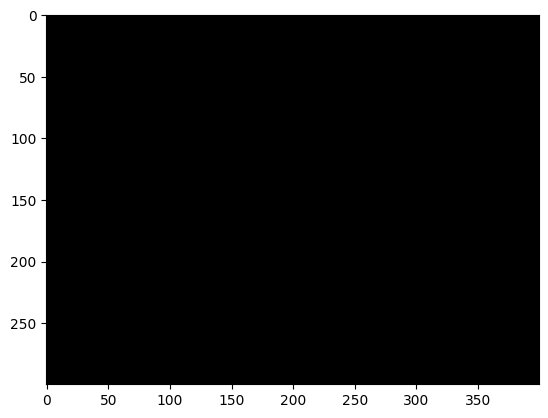

In [16]:
# create 2D array with 300 rows and 400 columns filled with zeros
# it will correspond to black image of size 300x400 pixels
flag_bw = np.zeros((300, 400), dtype=int)

plt.imshow(flag_bw, cmap="gray", clim=(0, 255))

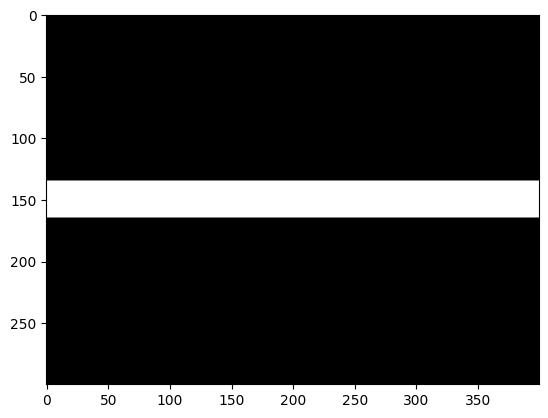

In [17]:
# fill the 30 rows in the middle with white color
flag_bw[135:165, :] = 255

plt.imshow(flag_bw, cmap="gray", clim=(0, 255))

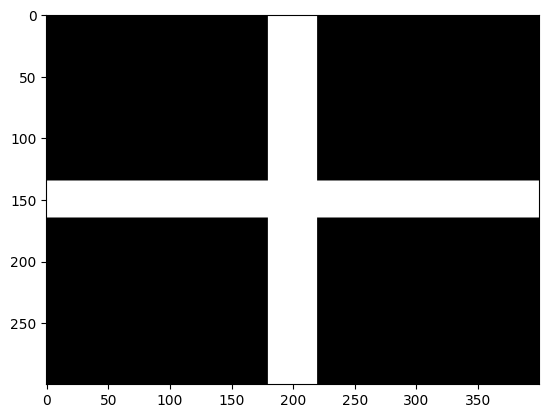

In [18]:
# fill the 40 columns in the middle with white color
flag_bw[:, 180:220] = 255

plt.imshow(flag_bw, cmap="gray", clim=(0, 255))

Finally, if you want to show image without any axes or boxes, you can remove them as it is shown below.

(-0.5, 399.5, 299.5, -0.5)

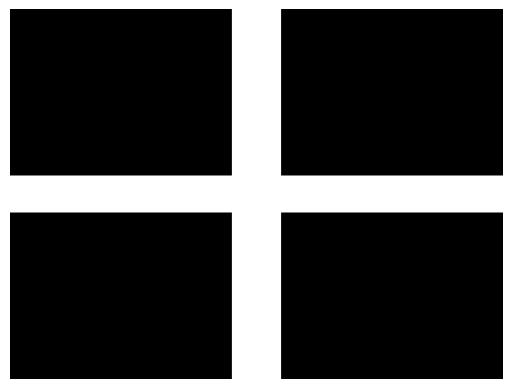

In [19]:
# show the result and remove axes
plt.imshow(flag_bw, cmap="gray", clim=(0, 255))
plt.axis("off")

You can also change pixels by taking into account both coordinates — the row and the column. In this case you need to use nested loops — one for rows and one for columns. In the next example we use nested loop to change pixels in a way to form a white triangle.

In [20]:
nrows = 100 # height
ncols = 100 # width


img_diag = np.zeros((nrows, ncols), dtype=int)

>**Note to teacher:**<br> make a table on black board how this loop and condition works for r = 0, 1, 2, and 10 and image of a smaller size (e.g. 5 x 5 or 10 x 10). Explain that it is actually not necessary to make a loop over all pixels in this case and show how to do it correctly. 

In [21]:
for r in range(0, nrows):
    for c in range(0, ncols):
        if c > r and c < ncols -  r:
            img_diag[r, c] = 255

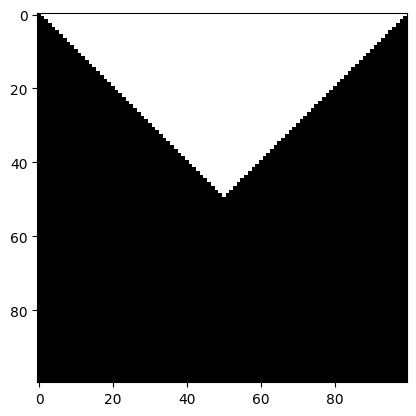

In [22]:

plt.imshow(img_diag, cmap="gray", clim=(0, 255))

Ad you can see, we use a new code structure here, `if`, which checks if a particular condition and run a code only if this condition is true. 

In this case it checks if the current column number `c` is between two values. One is the current row number `r` and the second one is located from the right part of the image by `r` pixels to the left. For example if `r = 10`, the condition will be true for all column indices between 10 and 90. Only if this condition is true, the code `img_diag[r, c] = 255` will be executed.

Pay attention to indentations in this code. The second `for` loop is nested inside the first one, so we shift this line. Then `if` statement should be executed inside the second `for` hence it has another shift. Finally `img_diag[r, c] = 255` should be executed only if the condition is true, so it should be nested inside the `if`. Usually a code line, which implies indentation, has a colon (`:`) symbol at the end of the line.


Try to play with this code and see if it works when the width is larger than the height or vice versa. Also try to increase the image size and see how it influences the size of the pixels. So the "stairs" pattern on the diagonal pixels will disappear at some point.

Finally, just for fun, we can also generate images as a set of random numbers. Every time you click "run" in the next code cell, you will get a new image.

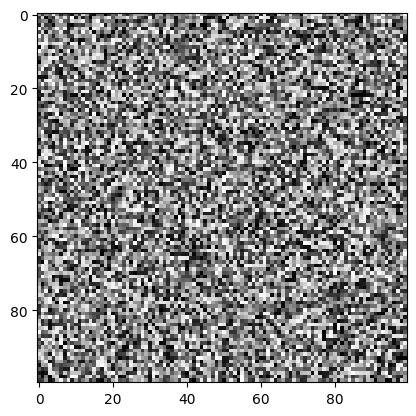

In [23]:
nrows = 100 # height
ncols = 100 # width

rand_img = np.random.randint(0, 255, (nrows, ncols))
plt.imshow(rand_img, cmap="gray", clim=(0, 255))

In this case you can clearly see the individual pixels. Try to increase the size of the image until you can not distinguish the pixels. You will quickly find out that at some point the image will look just like a gray image, because the average intensity of all pixels is 127. **Be careful for too large size the code can become slow.**

### Functions

As you have seen above we reuse some of the code patterns over and over again. For example, to create a new image we need to call `np.zeros()` and provide not only the image size but also the type of the numbers (`int`). Same for the plots, we always add `cmap` and `clim` values. This can be avoided if we create our own functions and reuse them. Here is an example:

In [24]:
def make_grim(nrows, ncols, fill = 0):
    """ Creates a grayscale image with given size and fill it with a given value """
    img = np.zeros((nrows, ncols), dtype=int)
    img.fill(fill)
    return img

def show_grim(img):
    """ Plot grayscale image assuming that intensities vary from 0 to 255 """
    plt.imshow(img, cmap="gray", clim=(0, 255))
    plt.axis("off")

Run the code above to load the functions into the memory. Now we can reuse them:

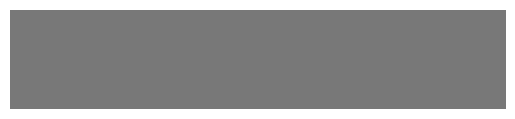

In [25]:
new_img = make_grim(100, 500, 120)
show_grim(new_img)

### Exercises

Time to practice. Write a code which will generate a black image with 300 x 300 pixels and creates a white circle with radius 50 pixels in the middle filled with a white color. Think how to make a circle without filling it inside, so the image contains only a perimeter of the circle.

To solve this task you need to proceed all pixels on the image and check if a pixel is inside the circle or not. You can do it by computing distance between this pixel and the center of the circle and comparing this distance with the radius. Here is an illustration for 150x150 pixel image and circle with radius 50 with center located at row (y) 75 and column (x) 75:

<img src="illustrations/circle.png" style="width:90%">

Think how to implement it in Python and write your code in the cell below:

In [26]:
# place your code for the first exercise here


Now let's make it harder. Write a function `make_circle(nrows, ncols, cx, cy, r)` which will create a black image of size `nrows x ncols` and make a circle of radius `r` with a center located in the point with coordinates `(cx, cy)`.

In [27]:
# place your function and test code here


If you want to challenge yourself even more, think, do you need to proceed all pixels on the image or you can limit their range? How? How faster this code will be?

Try to dd a check if the circle is partially located outside the image and process only pixels which are inside.

## Color images


Colors in digital images are represented using the RGB (Red, Green, Blue) model. The idea of this model is simple. If you take three light sources (e.g. LED or small lamps), one emits red light, second — green and third — blue. And if you place these three lamps close to each other, then on a distance it will be difficult to distinguish the individual colors, they will mix up to a single one. By changing intensities of the light one can make any color from these three. For example mixing red and green will give you yellow.

The image below (taken from Wikipedia) illustrates this effect. Three lights sources are projected on a wall and you can see that where two light spots overlap a new color appears. When all three light beams overlap it looks like a white color.

<img src="./illustrations/RGB_illumination.jpg" style="max-width:800px"/>

Therefore in order to make pixels shown as colors every pixel has three values — intensity of greed, blue and red colors. They also usually coded as a number between 0 and 255. 

For example, a pixel with RGB values `(255, 0, 0)` is fully red, while `(0, 255, 0)` is fully green, and `(0, 0, 255)` is blue. The combination of full intensity in all three channels, `(255, 255, 255)`, results in a white color, while absence of intensity in all channels, `(0, 0, 0)`, yields black.

Color images require more storage space and computational resources due to the presence of three channels for each pixel. Grayscale images generally require less storage space and computational resources, making it more efficient for certain applications.

One can think of a color image as thee grayscale images combined together as slices as shown in the image below

<img src="./illustrations/3-channel-1-channel.png" style="max-width:800px">

Therefore, we can create a color image by simply creating three grayscale images and stacking them together as "slices" of 3D array using NumPy. 

Open the second sheet of the [Excel file](../mlcourse.xlsm) and play with the RGB examples, then come back.

Here is an example how to make red, green and yellow images and show then all at once.

In [28]:
nrows = 100
ncols = 100

# create red image
ch_red = make_grim(nrows, ncols, 255) # 100x100 2D array filled with 255 - red channel
ch_green = make_grim(nrows, ncols, 0) # 100x100 2D array filled with 0 - green channel
ch_blue = make_grim(nrows, ncols, 0) # 100x100 2D array filled with 0 - blue channel

img_red = np.dstack((ch_red, ch_green, ch_blue)) # stack the channels into 3D array

# show the shape
img_red.shape

(100, 100, 3)

In [29]:
# show 5x5 pixels from top left corner
img_red[0:5, 0:5, :]

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]])

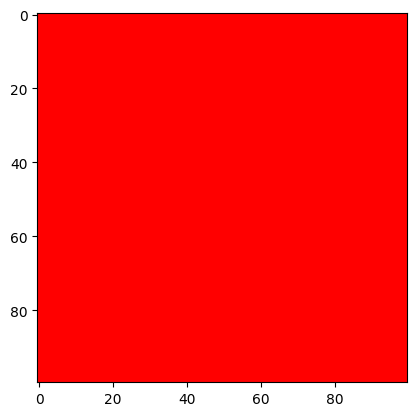

In [30]:
# show the resulted array as an image
plt.imshow(img_red)

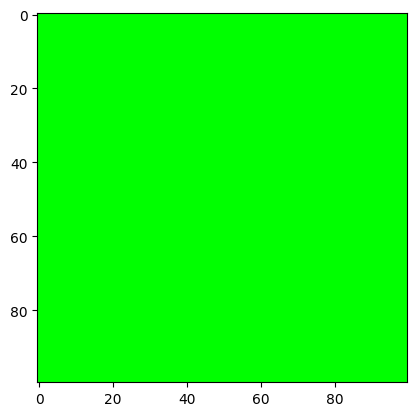

In [31]:
# create green image
ch_red = make_grim(nrows, ncols, 0)
ch_green = make_grim(nrows, ncols, 255)
ch_blue = make_grim(nrows, ncols, 0)

img_green = np.dstack((ch_red, ch_green, ch_blue))

plt.imshow(img_green)

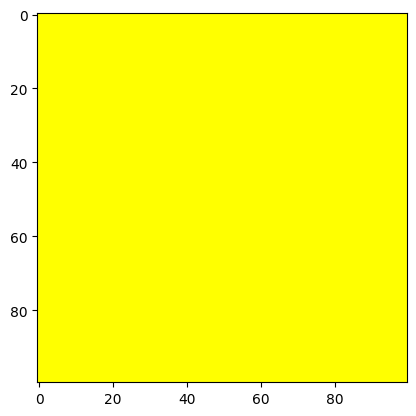

In [32]:
# create yellow image
ch_red = make_grim(nrows, ncols, 255)
ch_green = make_grim(nrows, ncols, 255)
ch_blue = make_grim(nrows, ncols, 0)

img_yellow = np.dstack((ch_red, ch_green, ch_blue))

plt.imshow(img_yellow)

(-0.5, 99.5, 99.5, -0.5)

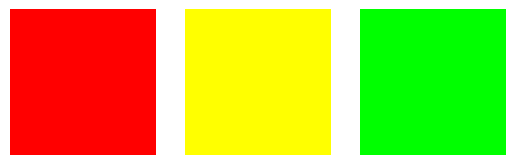

In [33]:
# show all images in the same figure by using sub plots

plt.subplot(1, 3, 1)
plt.imshow(img_red)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_yellow)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_green)
plt.axis("off")

This can be also done in a simpler way, like we did with the gray scale images, but this time we need to provide all three intensities:

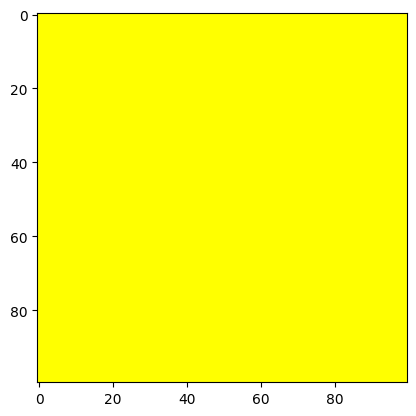

In [34]:
# first we create 3D array of 100x100x3 size and fill it with 0
img_yellow = np.zeros((100, 100, 3), dtype=int)

# then we assign new values — 255 (first slice) 255 (second slice) 0 (third slice)
img_yellow[...] = [255, 255, 0]

plt.imshow(img_yellow)

Now we can also see what happens if we mix the main colors. Let's create another image where each channel will be represented by a square of non-zero pixels. First let's do it individually for each channel:

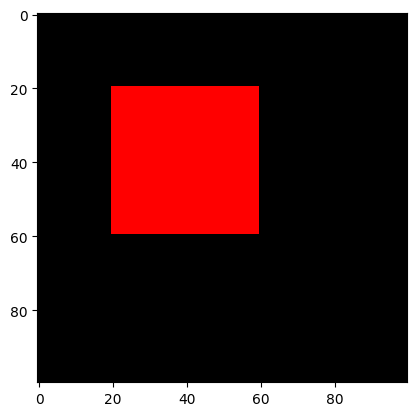

In [35]:
nrows = 100
ncols = 100

# create a 3D array with three channels (black image)
red_square = np.zeros((nrows, ncols, 3), dtype=int)

# fill the red channel of this image with 255
# but only pixels located in rows from 19 to 59 and in columns from 19 to 59
red_square[20:60, 20:60, :] = [255, 0, 0]
plt.imshow(red_square)

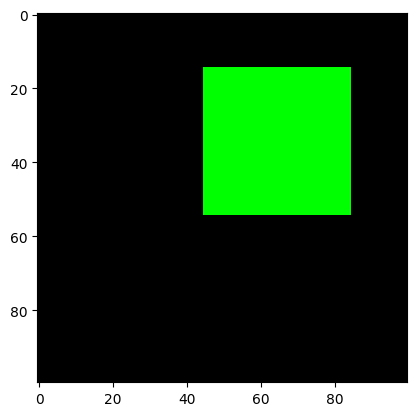

In [36]:

# create a 3D array with three channels (black image)
green_square = np.zeros((nrows, ncols, 3), dtype=int)

# fill the green channel of this image with 255
# but only pixels located in rows from 14 to 54 and in columns from 44 to 84
green_square[15:55, 45:85, :] = [0, 255, 0]
plt.imshow(green_square)

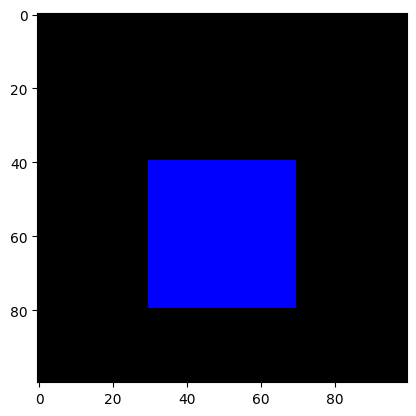

In [37]:

# create a 3D array with three channels (black image)
blue_square = np.zeros((nrows, ncols, 3), dtype=int)

# fill the blue channel of this image with 255
# but only pixels located in rows from 39 to 79 and in columns from 29 to 69
blue_square[40:80, 30:70, :] = [0, 0, 255]
plt.imshow(blue_square)

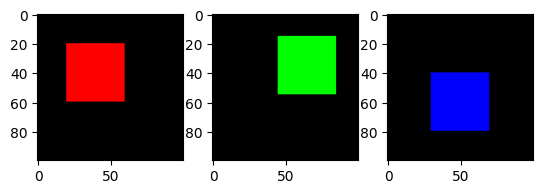

In [38]:
# show all three images together

plt.subplot(1, 3, 1)
plt.imshow(red_square)

plt.subplot(1, 3, 2)
plt.imshow(green_square)

plt.subplot(1, 3, 3)
plt.imshow(blue_square)

Although we see them as red, green and blue, every image is a color image with three channels (slices). Now let's take the first slice from the red image, second from the green and third from the blue and combine them together:

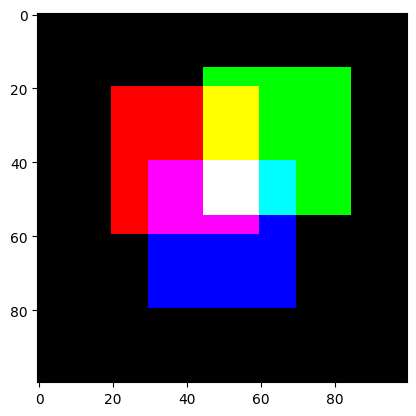

In [39]:
# stack first (0) slice from red image, second (1) slice from green and third (2) slice
# from the blue image into a new RGB image
merged = np.dstack(
    (
        red_square[:, :, 0],
        green_square[:, :, 1],
        blue_square[:, :, 2]
    )
)

plt.imshow(merged)

In [40]:
# show values from different parts of the image
merged[40:50, 50:55, :]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [25

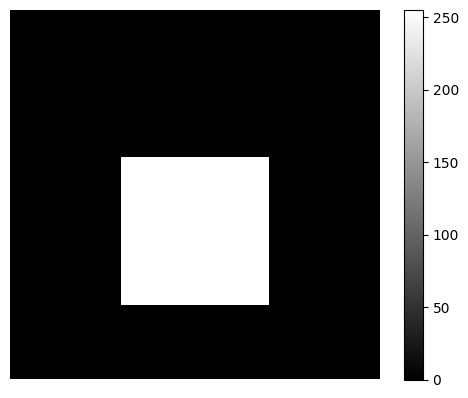

In [41]:
# show channels separately as shades of gray
show_grim(merged[:, :, 2])
plt.colorbar()

This image reproduces the example from Wikipedia we discussed before. By combining the three main colors with different intensities one can generate almost any color visible by a naked eye. In our case we have $256^3 = 16.777.216$ combinations yielding in more than 16 millions of different colors.

Finally, let's repeat the experiment with randomly generated images but this time for color image:

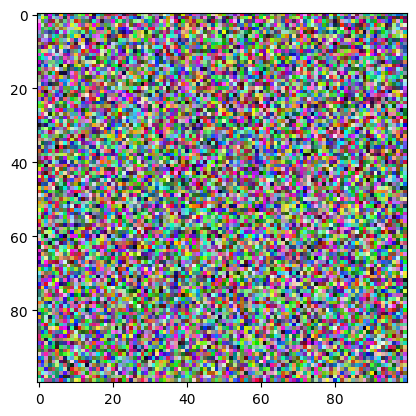

In [42]:
nrows = 100
ncols = 100

# generate random intensities for each channel
red_channel = np.random.randint(0, 255, (nrows, ncols))
green_channel = np.random.randint(0, 255, (nrows, ncols))
blue_channel = np.random.randint(0, 255, (nrows, ncols))

# combine/stack the matrices as slices of an RGB image and show it
rand_img = np.dstack((red_channel, green_channel, blue_channel))
plt.imshow(rand_img)

### Exercises

Time for new exercises. First of all create a code which generates the national flags of Denmark, Sweden and Norway. Search information regarding the correct colors in internet.

In [43]:
# place your code here


The next exercise is to repeat the example with overlapping squares, but make them circles instead. Try to reuse your code from the similar grayscale exercise.

In [44]:
# place your code here


Finally lets create an image of 256 x 256 size, which will show all combinations of blue and red colors. Then do the same for the other two pairs, red and green, and blue and green. The third color in each case my be set to 0.

In [45]:
# place your code here


## Load and save images as files


In a computer, images are stored in various file formats like PNG, JPEG, GIF, or BMP, where each format has its own way of encoding and compressing the pixel information. Usually JPEG is used for photos and PNG for all other graphics (e.g. diagrams, sketches, cartoons, etc). However in recent years PNG becomes a universal graphics format on Web.

If you want to load images from files, manipulate them and save the results into a new file, you have to use a specific library. Python has two very good ones: [PIL/Pillow](https://pillow.readthedocs.io/en/stable/) and [OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html). The last is very powerful while the first is more simple and easier to start with, so we will use PIL for this class.

Let's install it first.

In [46]:
! pip install pillow

zsh:1: command not found: pip


>*PIL* stands for the *Python Image Library*. The developers of this library stopped their activities, but successors took their project and continue development using a new name *Pillow*. However inside Python the library has its original name, PIL.

Now let's generate a random color image and save it on a disk as a PNG file. We will reuse the code we wrote before for generation. First let's see how you can convert array of numbers to the PIL image:

In [47]:
nrows = 100
ncols = 100

# generate random intensities for each channel
red_channel = np.random.randint(0, 255, (nrows, ncols))
green_channel = np.random.randint(0, 255, (nrows, ncols))
blue_channel = np.random.randint(0, 255, (nrows, ncols))

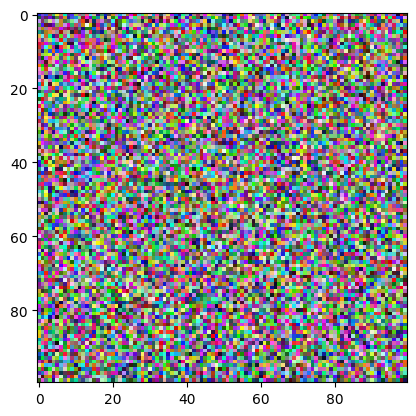

In [48]:
# combine/stack the matrices as slices of an RGB image and show it
rand_img = np.dstack((red_channel, green_channel, blue_channel))
plt.imshow(rand_img)

In [49]:

# load class Image from the library
from PIL import Image

# convert the array to PIL image
img = Image.fromarray(np.uint8(rand_img), mode="RGB")

# show types of variables "img" and "rand_img"
(type(img), type(rand_img))

(PIL.Image.Image, numpy.ndarray)

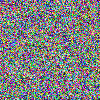

In [50]:
# show image
display(img)

>**Note to a teacher:**<br>explain main difference between using `display()` and `plt.imshow()`.

As you can see, to convert an array into PIL Image object, first you need to "tell" Python that the data you have in the array `rand_img` is unsigned integer data coded by 8 bits (this is the exact meaning of `uint8`). 

What it means? Unsigned means no sign, so all numbers are positive. Integer means whole numbers, without decimals. And 8 bits means that every value is coded by a sequence of 8 binary digites, 0 and 1. For example 0 in binary format is `00000000` and 255 is `11111111`. Value of 64 is coded as `01000000`. And so on. 

You do not need to know these details but this is exactly what happens inside this block of code: `np.uint8(rand_img)`. It lets Python know that the numbers inside this array have this format. 

After this, PIL function `fromarray()` takes this array and return a special object, the PIL image. Finally, we use `display()` function from the PIL library to display the image and it is displayed correctly by default without any axes, margins etc.

Now we can save the result into a file, let's use PNG format in this case.

In [51]:
img.save("mysuperimage.png")

After running this code, look at the left panel of VSCode where it shows all files. Do you see the new file with this name? Click on it and you will see the image. Alternatively you can navigate to this folder in your Windows or Mac file explorer and find the file there.

Similarly you can load image from file into your Python program and see it as NumPy array. We prepared some images for you, they are located in folder `datasets`. Let's load image from file `Apples.jpg` located in this folder.


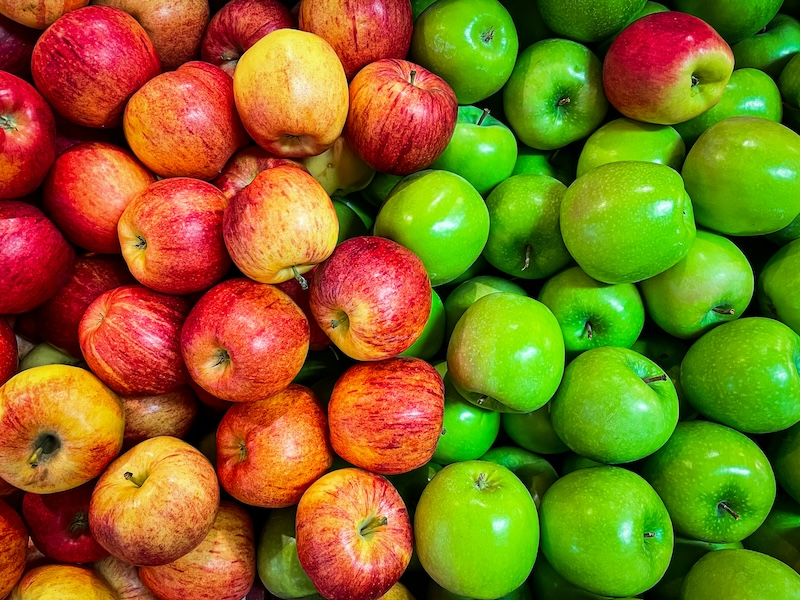

In [52]:
img = Image.open("datasets/Apples.jpg")
display(img)

Actually in Jupyter notebook you do know even need to use `display()` just write the name of the image variable and run the cell:

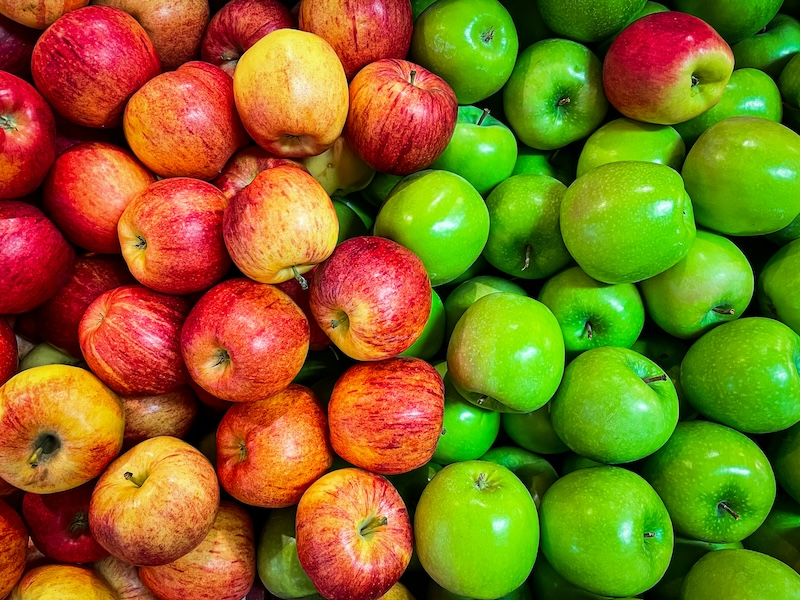

In [53]:
img

Looks good! Let's see some information about image, like size and color mode.

In [54]:
(img.size, img.mode)

((800, 600), 'RGB')

Finally you can convert the image into NumPy array and see what is inside:

In [55]:
arr = np.array(img)
arr[0:5, 0:5, :]

array([[[200, 109,  39],
        [189,  97,  32],
        [164,  71,  14],
        [174,  80,  29],
        [170,  75,  29]],

       [[196, 102,  38],
        [203, 110,  49],
        [188,  93,  39],
        [166,  72,  21],
        [161,  65,  17]],

       [[178,  81,  28],
        [194,  99,  45],
        [191,  94,  43],
        [173,  77,  26],
        [171,  73,  24]],

       [[162,  64,  17],
        [175,  79,  29],
        [179,  82,  31],
        [175,  78,  27],
        [171,  74,  23]],

       [[163,  66,  21],
        [160,  65,  17],
        [162,  66,  15],
        [157,  62,   8],
        [156,  61,   5]]], dtype=uint8)

As you can notice, in these pixels there is more red than the other two colors, which matches what we see in the corner of the photo (red apples).

Here is the size (shape) of the image array vs size of the image:


In [56]:
(img.size, arr.shape)

((800, 600), (600, 800, 3))

As you can see, in case of image size it shows width first (800 pixels) and then height (600 pixels). But in case of size of array, it shows number of rows first, which corresponds to the image height. And then shows the number of columns (image width). Remember about this when you will use arrays directly.

We can now split the image into channel and show intensities separately:

Text(0.5, 1.0, 'Blue')

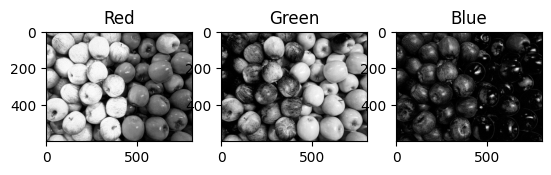

In [57]:
plt.subplot(1, 3, 1)
plt.imshow(arr[:, :, 0], cmap="gray", clim=[0, 255])
plt.title("Red")

plt.subplot(1, 3, 2)
plt.imshow(arr[:, :, 1], cmap="gray", clim=[0, 255])
plt.title("Green")

plt.subplot(1, 3, 3)
plt.imshow(arr[:, :, 2], cmap="gray", clim=[0, 255])
plt.title("Blue")

This split clearly shows that there are more red on the left part of the image, more green on the right part and there is almost no blue in the whole image, except the small white spots (remember white is when red, green and blue colors have largest intensity)

## Capture images from computer camera


You can also capture images directly from your computer (or other device) cameras. In order to do this we will use another very powerful library for working with digital images and video — [Open CV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html). 

First of all, let's install it. Run the following code once and then add symbol `#` in front of the code to avoid running it again.

In [58]:
! pip install opencv-python

zsh:1: command not found: pip


In order to capture video frames you need to connect your Python session to a camera. Some computers have several cameras, so you need to specify which one to connect. Just try 0 or 1 and it should work.

Here is a code to make connection to the camera. When you run it your system (Windows or Mac) will ask for permission which you need to give. After that you will see a light on your computer screen which indicates that camera is working.

If you stop the code, restart or close the notebook, the connection will be automatically closed. You will learn below how to close connection to camera manually as well. Let's connect:

In [59]:
import cv2
camera = cv2.VideoCapture(0)
camera.isOpened()

2024-06-28 09:04:09.657 Python[32521:6573843] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


True

If you see the camera indicator on it works. You should also get `True` as a result of function `isOpened()` above. 

Now let's learn how to capture the video frames and show them. Here is a simple code which does this. Every time you click *Run* button it takes one frame and show it on the screen as an image.

TypeError: Image data of dtype object cannot be converted to float

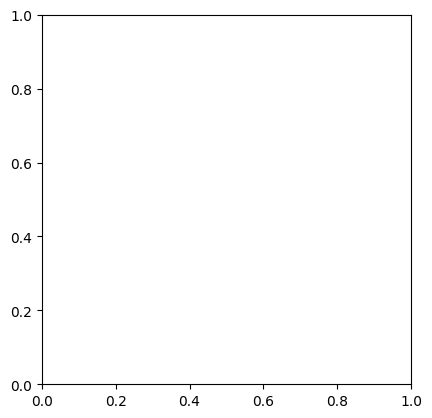

In [60]:
ret, frame = camera.read()
plt.imshow(frame)

If you look into the `frame` you will find out that it is just NumPy array, like the ones we already worked before. 

In [ ]:
frame

So you can do with the captured frames everything that you do with images you created manually or loaded from files. 

Here is how to close connection to the camera:

In [ ]:
camera.release()

## Image transformations 


Image transformation implies producing a new image based on the current one. Python makes it easy to perform basic transformations on digital images either manually, by doing manipulations with arrays, or by using methods from dedicated libraries.

Some common operations include:    

**Geometric transformations** — change position (geometric coordinates) of the pixels on a new image.
*  Cropping, flipping, merging
*  Resizing
*  Rotation 
*  Distortions

**Intensities transformations** — behold position of the pixels, but change their color intensity.
*  Color conversion
*  Contrast enhancement
*  Filtering
  

We will first learn how to do some of the transformations by manipulating arrays, to grasp the basics, but then switch to PIL library, as it does it quicker and easier.



### Image transformations by arrays manipulations

Let's start with cropping. *Cropping* involves removing parts of the image to focus on a particular area of interest, often used for removing unwanted elements in the image. Cropping is easy to do by subsetting rows and columns of the array with color intensities.

Let's load the apple image again and convert it to NumPy array:

In [ ]:
img = Image.open("datasets/Apples.jpg")
img_arr = np.array(img)
img_arr.shape

Let's split the image to two, so the first one contains only the red apples and the second one contains only the green ones. 

We know that the width of the original image is 800 pixels (the array has 800 columns), so we can simply take a subset of the columns:

In [ ]:
# take columns with indices from 0 to 399 (first 400 columns)
red_apples = img_arr[:, 0:400]
(img_arr.shape, red_apples.shape)

In [ ]:

# take columns with indices from 400 to 799 (last 400 columns)
green_apples = img_arr[:, 400:800]

# show the cropped images
plt.subplot(1, 2, 1)
plt.imshow(red_apples)
plt.title("Red")

plt.subplot(1, 2, 2)
plt.imshow(green_apples)
plt.title("Green")

It works, but we can see some red apples among the green ones. Let's crop the image starting from column 500 instead, plus skip the first 150 rows. Let's do the same also for the red apples in order to let both images having the same size:

In [ ]:
# take rows with indices from 150 to 599 and columns with indices from 0 to 299 (first 300 columns)
red_apples = img_arr[150:600, 0:300]

# take columns with indices from 500 to 799 (last 300) and the same rows
green_apples = img_arr[150:600, 500:800]

# show the cropped images
plt.subplot(1, 2, 1)
plt.imshow(red_apples)
plt.title("Red")

plt.subplot(1, 2, 2)
plt.imshow(green_apples)
plt.title("Green")

Looks better! In fact, if an index involves the last row or the last column we can skip it and leave its place empty. Same in case if an index starts with the first (zero) row or column:

In [ ]:
# same operation but without explicit declaration of the last row and the first column
red_apples = img_arr[150:, :300]

# same operation but without explicit declaration of the last row and the last column
green_apples = img_arr[150:, 500:]

# show the cropped images
plt.subplot(1, 2, 1)
plt.imshow(red_apples)
plt.title("Red")

plt.subplot(1, 2, 2)
plt.imshow(green_apples)
plt.title("Green")

Now we can also *flip* the images vertically or horizontally (or both) by changing order of the rows and columns. In this case we need to provide an extra element in the sequence of indices, which will be the step. If we use step -1 we take the last row and make it first, then take the row before the last and make it the second etc. 

Here is how it works with rows:

In [ ]:
# flip image vertically by reordering rows of pixels in reverse order
red_apples_vf = red_apples[::-1, :]

# show the cropped images
plt.subplot(1, 2, 1)
plt.imshow(red_apples)
plt.title("Red (original)")

plt.subplot(1, 2, 2)
plt.imshow(red_apples_vf)
plt.title("Red (flipped vertically)")

Write a code which will also flip red apples vertically and both vertically and horizontally. Show a figure with all four images together — the original one and the three flipped ones (vertical, horizontal and both).

In [ ]:
# place your code here
red_apples_vf = red_apples[::-1, :]
red_apples_hf = red_apples[:, ::-1]
red_apples_bf = red_apples[::-1, ::-1]

plt.figure(figsize=(6, 8))

# show the cropped images
plt.subplot(2, 2, 1)
plt.imshow(red_apples)
plt.title("Red (original)")

plt.subplot(2, 2, 2)
plt.imshow(red_apples_vf)
plt.title("Red (flipped vertically)")

plt.subplot(2, 2, 3)
plt.imshow(red_apples_hf)
plt.title("Red (flipped horizontally)")

plt.subplot(2, 2, 4)
plt.imshow(red_apples_bf)
plt.title("Red (flipped both ways)")

In [ ]:
red_apples.shape
more_apples = np.hstack((red_apples, red_apples, red_apples))

even_more_apples = np.vstack((more_apples, more_apples))
plt.imshow(even_more_apples)





If two (or more) images are represented by arrays with the same number of rows, columns or both, they can be merged into a new image. You can merge arrays (and hence the corresponding images) by stacking the vertically or horizontally. You can make a sequence of stacks. Here is an example:

In [ ]:
# make the crops again
red_apples = img_arr[150:, :300]
green_apples = img_arr[150:, 500:]

# flip the images both vertically and horizontally
red_apples_flipped = red_apples[::-1, ::-1]
green_apples_flipped = green_apples[::-1, ::-1]

# stack the images horizontally
img_top = np.hstack((red_apples, green_apples_flipped))
img_bottom = np.hstack((green_apples, red_apples_flipped))

# stack the previous results vertically
img = np.vstack((img_top, img_bottom))

# show the result
plt.imshow(img)

# show the dimension of the new image
img.shape

Finally you can also transpose an image — flipping it along its main diagonal. Here is illustration from [Wikipidea](https://en.wikipedia.org/wiki/Transpose):

<img src="illustrations/Matrix_transpose.gif" style="width:200px" >

Transposition can be also made by rotation of the image by 90 degrees and reversing the columns. In other words it simply makes rows as columns and columns as rows. 

Because we have 3D array (with three color channels) we need to tell NumPy explicitly how to transpose it. Because rows is the first dimension (with index 0), columns is the second dimension (with index 1) and color channels is the third dimension (with index 2), we define the new transposition of rows and columns by swapping their indices:

In [ ]:
# transpose image array
img_transposed = img.transpose((1, 0, 2))
img_transposed.shape

In [ ]:
# show the result
plt.imshow(img_transposed)

Try to change the code above to crop the image for focusing on the green apples instead.



### Image transformations in PIL

Now let's learn how to do transformations in PIL. All transformations can be actually done manually by using NumPy arrays, but it will require a lot of code. So we will reuse the code already written by the PIL/Pillow developers.

First of all you can do all operations we discussed above in PIL as well. Let's load the apple image again and crop it to focus on the part with red apples.


In [ ]:
img = Image.open("datasets/Apples.jpg")

# defining the bounding box (left, upper, right, lower) for red apples part
box_red = (0, 0, 300, 600)

# crop the image into new ones)
img_red = img.crop(box_red)

# show the cropped image
display(img_red)

You can also flip images in PIL as shown the code below:

In [ ]:
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Here is how to resize the image.

In [ ]:
# definig the new size in pixels (width, height)
new_size = (400, 300)

resized_img = img.resize(new_size)
display(resized_img)

Keep in mind that resizing does not keep the correct aspect ratio, it is your responsibility. Otherwise you can make some distortions like the following.

In [ ]:
# definig the new size which does not keep the correct aspect ratio
new_size = (400, 100)

resized_img = img.resize(new_size)
display(resized_img)

Rotation alters the orientation of an image by a specified angle, allowing for adjustments to the image's orientation or alignment. It's useful for correcting skewed images or achieving desired visual effects. 

In [ ]:
# Rotation the image by 40 degrees clockwise
rotated_image = img.rotate(40)
display(rotated_image)

As you can see the rotated image has the same size as the original. You can change this if you add additional argument to the `rotate()` function:

In [ ]:
# Rotation the image by 40 degrees clockwise and resize
rotated_image = img.rotate(40, expand=1)
display(rotated_image)

You can also distort the images by applying geometric transformation which changes the coordinates of the pixels so they do not match the original coordinate grid. One of the examples of such distortion is *sheering*.

Shearing distorts the shape of an image along one axis by shifting each point by an amount proportional to its distance from a particular axis. This transformation introduces a "sheared" appearance, useful for creating unique visual effects or correcting perspective distortions.

In [ ]:
# Defining the shearing factor
shear_factor = 0.7

# Shearing the image horizontally
sheared_image = img.transform(img.size, Image.AFFINE, (1, shear_factor, 0, 0, 1, 0))

display(sheared_image)

Try to play with the sheering factor and see how it affects the outcome. 

You probably wonder why distort the images? Well in fact these kind of transformations are mostly used to do the opposite — remove the distortion introduced e.g. by camera or other obstacles. But sometimes distortion is also a way to enrich the image dataset in order to train a good model, which we will discuss in the last class.

The three transformations we discussed: rotation, flipping and sheering are a part of more general class of geometric transformation of the image pixels — *[affine transformations](https://www.graphicsmill.com/docs/gm/affine-and-projective-transformations.htm)*. One can think of affine transformation as a mathematical expression which takes coordinates of every pixel, e.g. (10, 20) and then computes new coordinates for this pixel and make this new coordinates fit the image plane.

### Transformation of intensities

The simples transformation with intensities is a conversion between different color models. For example, you can take a color image represented by RGB (Red, Green, Blue) model and make it  grayscale. It's commonly used for simplifying images or preparing them for processing tasks.

Here is an example

In [ ]:
# Converting an image to grayscale
grayscale_img = img.convert("L")
display(grayscale_img)

The other ways to work with intensities include point or area operations. Point operations can be applied to every pixel. 

For example in the code below we do a threshold operation — compare intensity of every pixel on grayscale image with 128 and return either 0 (if intensity is below or equal to 128) or 255 (if it is above) as a result.

In [ ]:
# compare intensity of every pixel with 128 and return either 255 or 0
bw_img = grayscale_img.point(lambda p: 255 if p > 128 else 0)
display(bw_img)

And here is an example to increase the contrast of the intensities:

In [ ]:
new_img = grayscale_img.point(lambda p: 255 * p / 200)
new_img

The plot below shows what happened. It takes all pixels with intensity 200 or above and make them all to have intensity of 255. So the variation of the intensities will be larger. Try to play with this code and make different contrast.

In [ ]:
plt.subplot(2, 1, 1)
plt.bar(range(0, 256), grayscale_img.histogram())

plt.subplot(2, 1, 2)
plt.bar(range(0, 256), new_img.histogram())


Another way to change the intensity of pixels is to make them dependent on its neighbors. This transformation is called *filtering*. There are many filters available, some of them have practical meaning, e.g. removing noise on images, some of them are used mostly for creating funny effects. 

One of the most common family of filters is *blurring* filters — they blur fine details on an image. One of the simplest is median filter, which computes new intensity of every pixel by taking median of intensities of its neighbors. 

Open the third sheet of the [Excel file](../mlcourse.xlsm) and play with filtering example, then come back.

Here is an example with filter size 7 x 7 so the median intensity will be computed for a given pixel and its 48 neighbors around it:

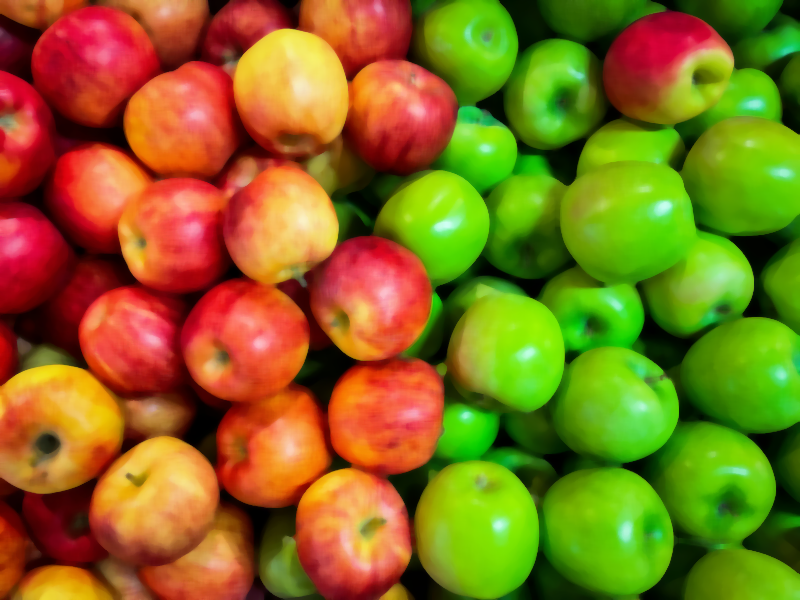

In [61]:
# load class which contains all filters from PIL
from PIL import ImageFilter

# apply median filter with window 7x7
blurred_img = img.filter(ImageFilter.MedianFilter(size=9))
display(blurred_img)

You can of course combine filters into a sequence. 

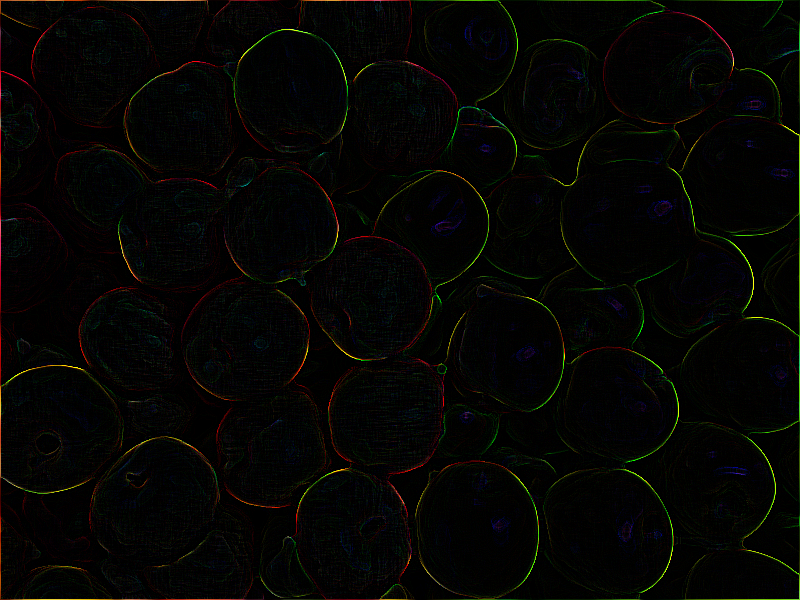

In [62]:
img = Image.open('datasets/Apples.jpg')
blurred_img = img.filter(ImageFilter.MedianFilter(size=11))
edges_img = blurred_img.filter(ImageFilter.FIND_EDGES)
display(edges_img)

## Batch processing


Of course you can apply any of the actions you learned above together and to a large number of images simultaneously. This is usually called as *batch processing*. In order to do that follow the guidelines:

1. Create a function which applies all transformation you need to one single image.
2. Put all images that you want to transform to a dedicated folder.
3. Create an empty folder for the transformed images.

After that let Python do the job for you. It has a specific library, `os`, which can work with files, read a list of files from a directory, etc. 

Inside `dataset` folder (you can see it on the right panel of your VSCode or in file explorer of your system) we prepared a directory with some stock color images of nature. They have difference sizes, aspect ratios etc. Let write a code which will do the following:

1. Loads every image from the folder
3. Resizes it to the same size of 300 x 200 pixels (or any other)
2. Blurs it with median filter of size 5x5
4. Saves the result to a new folder

Let's start with creating a function which will do all transformations for an input image and return the result as PIL image as well. Read the code and then run the cell. It will do nothing but load the function to memory so you can use it later.

In [ ]:
from PIL import ImageFilter

def transform(img, new_size = (300, 200)):
    # resize
    img = img.resize(new_size)
    # blur
    img = img.filter(ImageFilter.MedianFilter(size=5))
    # return the result
    return img

Now let's learn how to use library `os` to get all files from a specific folder:

In [ ]:
import os

# defining a directory containing images
img_dir = "datasets/images/"

# listing all files in the directory
img_files = os.listdir(img_dir)

img_files

As you can see, the method `os.listdir()` returns a list of all files located inside this folder. Now we can loop over the files and do the batch processing:

In [ ]:
from PIL import Image
import os

# Specifying your input and output folders
input_folder = "datasets/images/"
output_folder = "datasets/processed-images/"

# specifying the new size for the images
new_size = (300, 200)

# making sure the output folder exists, or create it
os.makedirs(output_folder, exist_ok=True)


In [ ]:

files = os.listdir(input_folder)

# looping through each file in the input folder
for filename in files:

    # make full path to the input and output image
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)

    # read the image from file
    img = Image.open(input_path)

    # apply transformations
    new_img = transform(img, new_size)

    # save the transformed image to the output folder
    new_img.save(output_path)

Run it and you will see that you got a new folder inside `datasets` — `processed images`. It contains the same files as in `images` but if you compare them you will see that all files in the new folder contain the transformed images.

### Exercise

Change the batch processing so it does the following transformation:

1. It changes size of image, so it becomes 50% smaller (aspect ratio must be the same)
2. If height of images is larger than its width, it rotates the image anticlockwise (with size expansion).
3. It converts images to grayscale format.
4. It applies the edge detection filter.

Run the procedure and check the output folder that it works correctly